1.Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

2.Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

3.Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

4.Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

5.Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
states_all2 =pd.read_csv("states_all.csv")
states_all2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


1.Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

In [7]:
states_all2["overall_score"] = (states_all2["GRADES_4_G"]*
                                (
                                    (states_all2["AVG_MATH_4_SCORE"] +
states_all2["AVG_READING_4_SCORE"])/2
                                ) + 
                                states_all2["GRADES_8_G"] * 
                                (
                                    (states_all2["AVG_MATH_8_SCORE"] + states_all2["AVG_READING_8_SCORE"])/2)
                               )/(states_all2["GRADES_4_G"] + states_all2["GRADES_8_G"])

2.Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır? 

In [9]:
states_all2[["TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE","overall_score"]
           ].corr()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,overall_score
TOTAL_EXPENDITURE,1.000000,0.991347,0.993314,0.946110,0.089937
INSTRUCTION_EXPENDITURE,0.991347,1.000000,0.976889,0.909340,0.103678
SUPPORT_SERVICES_EXPENDITURE,0.993314,0.976889,1.000000,0.953091,0.094103
OTHER_EXPENDITURE,0.946110,0.909340,0.953091,1.000000,0.004678
overall_score,0.089937,0.103678,0.094103,0.004678,1.000000


INSTRUCTION_EXPENDITURE ile en yuksek korelasyon goruyoruz. Diger harcamalarla ise dusuk bir korelasyon gorulmektedir. 


In [19]:
sns.set()

# Load the example flights dataset and conver to long-form
Expenditure = sns.load_dataset("states_all2")
states_all2 = Expenditure.pivot("TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE","overall_score")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(states_all2, annot=True, fmt="d", linewidths=.5, ax=ax)

HTTPError: HTTP Error 404: Not Found

Text(0.5, 1.0, 'Korelasyon Matrisi (state_all3)')

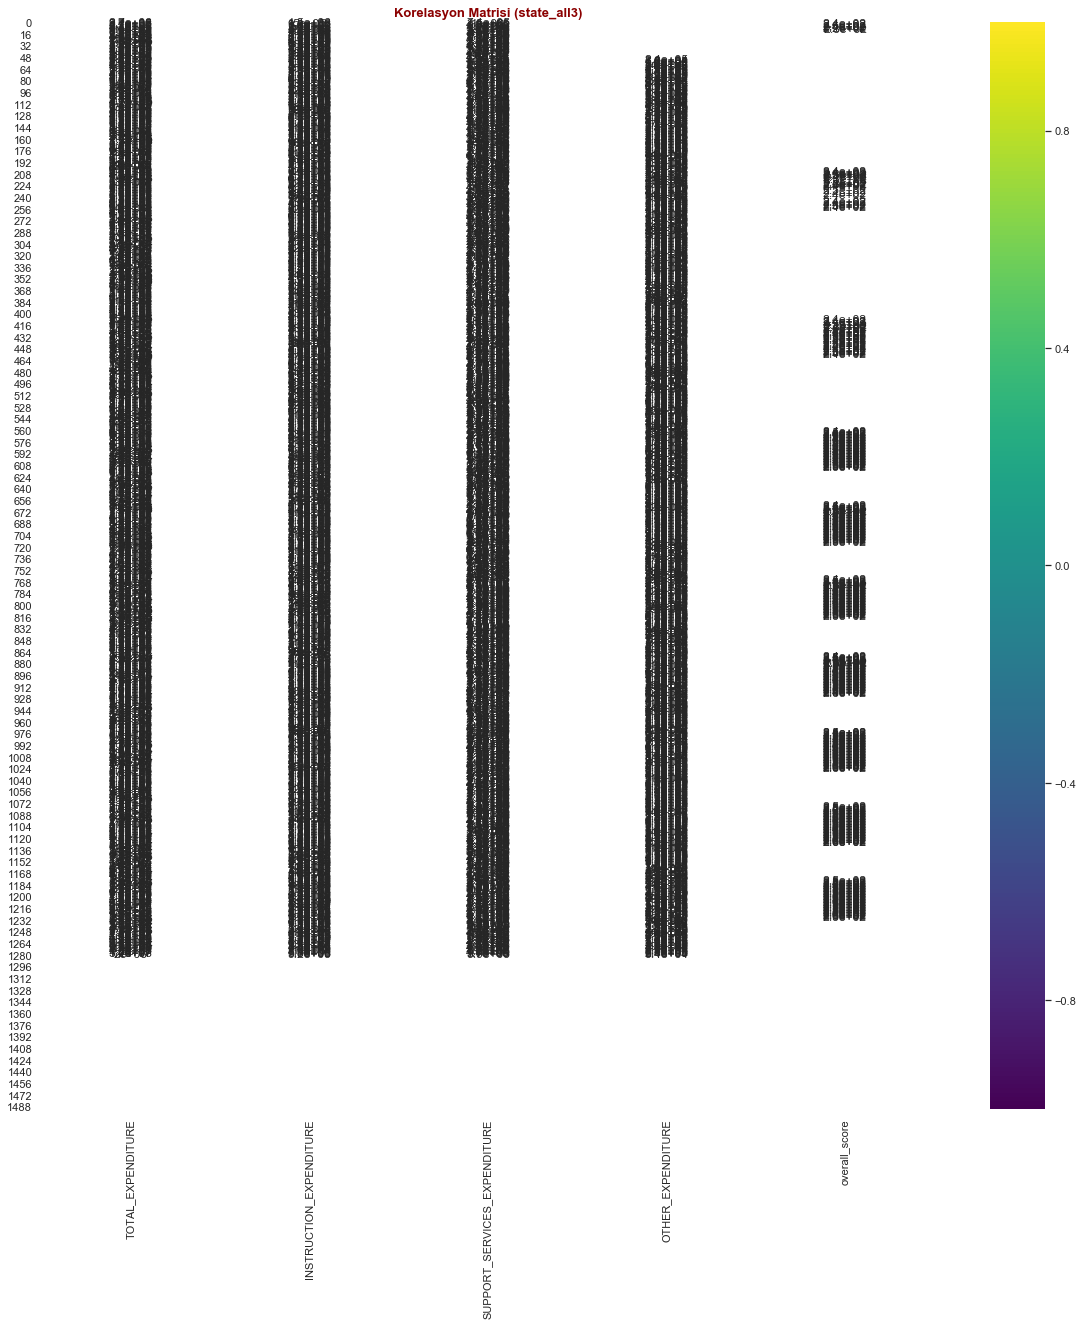

In [15]:
#Korelasyon Matrisi 
sns.set()
A = states_all2[["TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE","overall_score"]]

plt.figure(figsize=(20,20))
sns.heatmap(A, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (state_all3)", fontdict = baslik_font)

3.Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?


In [10]:
states_all3 = states_all2[["TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE"]]
states_all3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 4 columns):
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
dtypes: float64(4)
memory usage: 46.7 KB


In [12]:
X = states_all2[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "TOTAL_EXPENDITURE", "OTHER_EXPENDITURE"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
states_all2["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'Toplam varyansın ilk bileşen tarafından açıklanan miktarı :  ',
    sklearn_pca.explained_variance_ratio_
)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0] 

Y = P.T.dot(Xt) 

print(
    'Veri kümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Çözümlerin Karşılaştırılması')
plt.ylabel('Sklearn Bileşeni 1')
plt.xlabel('Elle Hesaplanan Bileşen 1')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:

A = states_all2
print(A)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

                    PRIMARY_KEY                 STATE  YEAR  ENROLL  \
0                  1992_ALABAMA               ALABAMA  1992     NaN   
1                   1992_ALASKA                ALASKA  1992     NaN   
2                  1992_ARIZONA               ARIZONA  1992     NaN   
3                 1992_ARKANSAS              ARKANSAS  1992     NaN   
4               1992_CALIFORNIA            CALIFORNIA  1992     NaN   
5                 1992_COLORADO              COLORADO  1992     NaN   
6              1992_CONNECTICUT           CONNECTICUT  1992     NaN   
7                 1992_DELAWARE              DELAWARE  1992     NaN   
8     1992_DISTRICT_OF_COLUMBIA  DISTRICT_OF_COLUMBIA  1992     NaN   
9                  1992_FLORIDA               FLORIDA  1992     NaN   
10                 1992_GEORGIA               GEORGIA  1992     NaN   
11                  1992_HAWAII                HAWAII  1992     NaN   
12                   1992_IDAHO                 IDAHO  1992     NaN   
13    

ValueError: could not convert string to float: '1992_ALABAMA'

In [16]:
sklearn_pca = PCA(n_components=5)

X = StandardScaler().fit_transform(A)

Xt = X.T
Cx = np.cov(Xt)
print('Kovaryans matrisi :\n', Cx)

Kovaryans matrisi :
 [[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]


4.Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

In [36]:
states_all2.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,overall_score
YEAR,1.000000,0.033393,0.236281,0.275597,0.220017,0.226148,0.229592,0.228180,0.247312,0.194895,...,0.042773,0.108582,0.030393,0.070147,0.037877,0.691727,0.490964,0.327086,0.201923,0.482224
ENROLL,0.033393,1.000000,0.914077,0.893755,0.914520,0.846918,0.915009,0.880823,0.917537,0.953080,...,0.997256,0.982295,0.997033,0.995357,0.997681,-0.005537,-0.037240,-0.067467,-0.006419,-0.046763
TOTAL_REVENUE,0.236281,0.914077,1.000000,0.928324,0.972590,0.964969,0.999024,0.990375,0.994848,0.947041,...,0.909801,0.939828,0.898374,0.927197,0.906995,0.163007,0.111477,0.066415,0.020289,0.092120
FEDERAL_REVENUE,0.275597,0.893755,0.928324,1.000000,0.920741,0.848877,0.928646,0.893734,0.931638,0.947427,...,0.882337,0.924164,0.870636,0.901819,0.880561,0.123957,0.045111,-0.038412,0.010612,0.008142
STATE_REVENUE,0.220017,0.914520,0.972590,0.920741,1.000000,0.880126,0.970056,0.954485,0.968782,0.950550,...,0.913023,0.946841,0.902103,0.931911,0.909988,0.126164,0.070389,0.009954,0.017162,0.048331
LOCAL_REVENUE,0.226148,0.846918,0.964969,0.848877,0.880126,1.000000,0.965373,0.969880,0.957090,0.869894,...,0.841469,0.862819,0.830477,0.855557,0.838258,0.195823,0.158581,0.140875,0.023968,0.147521
TOTAL_EXPENDITURE,0.229592,0.915009,0.999024,0.928646,0.970056,0.965373,1.000000,0.991347,0.993314,0.946110,...,0.909858,0.938650,0.898292,0.926939,0.906932,0.158988,0.108318,0.063147,0.022551,0.089937
INSTRUCTION_EXPENDITURE,0.228180,0.880823,0.990375,0.893734,0.954485,0.969880,0.991347,1.000000,0.976889,0.909340,...,0.876886,0.904203,0.865823,0.894244,0.872927,0.160238,0.112391,0.083314,0.030369,0.103678
SUPPORT_SERVICES_EXPENDITURE,0.247312,0.917537,0.994848,0.931638,0.968782,0.957090,0.993314,0.976889,1.000000,0.953091,...,0.912708,0.945662,0.900891,0.930590,0.910130,0.169020,0.115861,0.065281,0.018656,0.094103
OTHER_EXPENDITURE,0.194895,0.953080,0.947041,0.947427,0.950550,0.869894,0.946110,0.909340,0.953091,1.000000,...,0.953039,0.972466,0.946163,0.963824,0.952564,0.075517,0.011494,-0.029369,0.010578,0.004678


5.Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?